In [1]:
import importlib.util
import subprocess
import sys


def install_and_import(packages):
    for pkg in packages:
        package = pkg
        try:
            importlib.util.find_spec(package)
            print(f"{package} is already installed.")
        except importError:
            # 모듈이 설치되어 있지 않은 경우 설치 시도
            print(f"{package} is not installed. Installing...")
            subprocess.check_call([sys.executable, "-m", "%pip", "install", package])

            # 설치 후 다시 임포트를 시도
            importlib.import_module(package)
            print(f"{package} has been successfully installed.")

        # finally:
        # globals()[package] = importlib.import_module(package)
        except Exception as e:
            print(f"An error occurred while installing {package} : {str(e)}")


# 예시 사용법
install_and_import(["numpy", "pandas", "matplotlib", "seaborn", "sklearn"])

numpy is already installed.
pandas is already installed.
matplotlib is already installed.
seaborn is already installed.
sklearn is already installed.


In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
import koreanize_matplotlib
import scipy.stats as stats
import matplotlib.pyplot as plt

### 모집단과 표본


In [3]:
# 확률 표본 추출, 임의의 데이터 만들기
def rnames(n=5000):
    return ["".join(np.random.choice(list("ABCDEFGHIJKLMNOPQRSTUVWXYZ"), 5)) for _ in range(n)]


data = pd.DataFrame({"lastname": rnames(800), "score": np.random.normal(68, 2.4, 800)})
data.head()

,lastname,score
0,POYPV,64.987537
1,CVBBS,66.653179
2,JDVQQ,69.724572
3,LGTWQ,72.260381
4,XWFCQ,69.580402


#### 단순 임의 추출


In [4]:
# 단순 임의 추출
n = 10
index = np.random.choice(
    a=data.index, size=n, replace=False  # 뽑을 집합(모집단)  # 뽑을 표본의 수
)  # 비복원 추출(False), 복원 추출(True) 중복 허용
data.iloc[index]

,lastname,score
536,QKJCS,66.937602
699,GBZES,70.054639
263,HKVOQ,63.996267
490,JTHBD,68.677614
253,FQPOP,66.284694
593,RZRIZ,68.923752
590,WREWS,73.255713
399,WHFYN,72.029095
315,BZLST,71.072482
86,DURVG,66.656879


In [5]:
# 만약 할때마다 같게 하고 싶다면
np.random.seed(1234)
index = np.random.choice(data.index, n, replace=False)
data.iloc[index]

,lastname,score
192,INJWL,67.508274
65,DTLRZ,67.225521
605,WWVCL,65.724511
60,EFJDC,65.884793
537,ZNXGC,67.719266
620,ZYQSA,72.107534
78,XRIYQ,65.679306
104,ARYJI,69.622502
40,PVKSB,65.827605
747,UFGJI,68.936858


#### 층화 추출


In [6]:
data = pd.read_csv(
    "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data",
    header=None,
    names=[
        "sepal_length",
        "sepal_width",
        "petal_length",
        "petal_width",
        "species",
    ],
)
print(data["species"].value_counts())

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64


In [7]:
# 위 url이 안될 경우
# iris = datasets.load_iris()
# iris_df = pd.DataFrame(
#     data=np.c_[iris["data"], iris["target"]], columns=iris["feature_names"] + ["target"]
# )
# iris_df.columns = [
#     "sepal_length",
#     "sepal_width",
#     "petal_length",
#     "petal_width",
#     "species",
# ]
# data = iris_df
# print(data.shape)
# data.head()

In [8]:
# 데이터 분할
train, test = train_test_split(
    data,
    test_size=0.2,
    stratify=data["species"],
    random_state=1234,  # 층의 컬럼,
)  # np.random.seed()와 동일

print(train.shape, test.shape)
print("train : ", train["species"].value_counts())
print("test : ", test["species"].value_counts())

(120, 5) (30, 5)
train :  species
Iris-virginica     40
Iris-versicolor    40
Iris-setosa        40
Name: count, dtype: int64
test :  species
Iris-virginica     10
Iris-setosa        10
Iris-versicolor    10
Name: count, dtype: int64


In [9]:
# train:test = 0.8:0.2
# train안에서, species의 비율 = virginica : versicolor : setosa = 1 : 1 : 1
# test안에서, species의 비율 = virginica : versicolor : setosa = 1 : 1 : 1
# 이 비율은 원래 데이터 data['species'] 컬럼의 원래 비율에서 왔음

#### 계통 추출


In [10]:
# 모집단으로부터 첫 번째 추출단위를 임의추출(initial_num)하고,
# 두 번째 추출단위부터는 일정한 간격(k)으로 표본 추출
def smplg_sstm(population, initial_num, k):
    sample = []
    i = 0
    while initial_num + i * k < len(population):
        sample.append(population[initial_num + i * k])
        i += 1
    return sample


print(data.iloc[smplg_sstm(data.index, initial_num=10, k=8)])

     sepal_length  sepal_width  petal_length  petal_width          species
10            5.4          3.7           1.5          0.2      Iris-setosa
18            5.7          3.8           1.7          0.3      Iris-setosa
26            5.0          3.4           1.6          0.4      Iris-setosa
34            4.9          3.1           1.5          0.1      Iris-setosa
42            4.4          3.2           1.3          0.2      Iris-setosa
50            7.0          3.2           4.7          1.4  Iris-versicolor
58            6.6          2.9           4.6          1.3  Iris-versicolor
66            5.6          3.0           4.5          1.5  Iris-versicolor
74            6.4          2.9           4.3          1.3  Iris-versicolor
82            5.8          2.7           3.9          1.2  Iris-versicolor
90            5.5          2.6           4.4          1.2  Iris-versicolor
98            5.1          2.5           3.0          1.1  Iris-versicolor
106           4.9        

In [11]:
# N개의 데이터에서 등간격으로 n개 뽑기
def getsys(N, n):
    k = np.ceil(N / n).astype(int)
    r = np.random.randint(0, k)
    out = np.arange(r, N, k)[:n]
    return out


print(data.iloc[getsys(len(data), 10)])
# 150 / 10 = 15의 간격

     sepal_length  sepal_width  petal_length  petal_width          species
10            5.4          3.7           1.5          0.2      Iris-setosa
25            5.0          3.0           1.6          0.2      Iris-setosa
40            5.0          3.5           1.3          0.3      Iris-setosa
55            5.7          2.8           4.5          1.3  Iris-versicolor
70            5.9          3.2           4.8          1.8  Iris-versicolor
85            6.0          3.4           4.5          1.6  Iris-versicolor
100           6.3          3.3           6.0          2.5   Iris-virginica
115           6.4          3.2           5.3          2.3   Iris-virginica
130           7.4          2.8           6.1          1.9   Iris-virginica
145           6.7          3.0           5.2          2.3   Iris-virginica


### 확률과 확률 분포


In [12]:
# %pip install koreanize-matplotlib : 한글 깨짐 해결
# %pip install setuptools : 필요한 라이브러리 설치
import koreanize_matplotlib

In [13]:
install_and_import(["numpy", "pandas", "matplotlib", "seaborn", "scipy"])

numpy is already installed.
pandas is already installed.
matplotlib is already installed.
seaborn is already installed.
scipy is already installed.


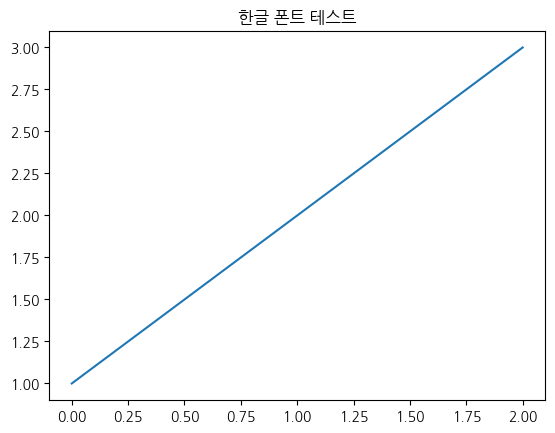

In [14]:
import matplotlib.pyplot as plt

plt.plot([1, 2, 3])
plt.title("한글 폰트 테스트")
plt.show()

#### 통계적 확률


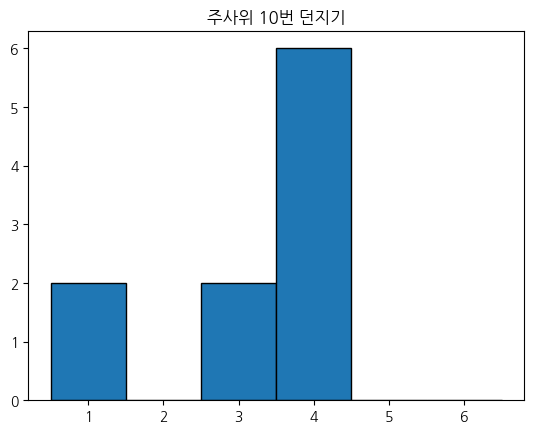

In [15]:
# 통계적 확률
# 주사위를 n번 던졌을 때 각 눈의 빈도 계산

## 주사위를 10번 던졌을 때
n = 10
data = np.random.choice(np.arange(1, 7), n, replace=True)
plt.hist(data, bins=np.arange(1, 8) - 0.5, edgecolor="black")
plt.title(f"주사위 {n}번 던지기")
plt.show()

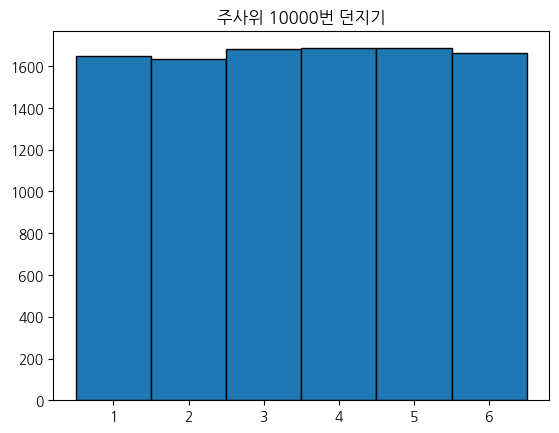

In [16]:
## 주사위를 10000번 던졌을 때
n = 10000
data = np.random.choice(np.arange(1, 7), n, replace=True)
plt.hist(data, bins=np.arange(1, 8) - 0.5, edgecolor="black")
plt.title(f"주사위 {n}번 던지기")
plt.show()

##### 참고


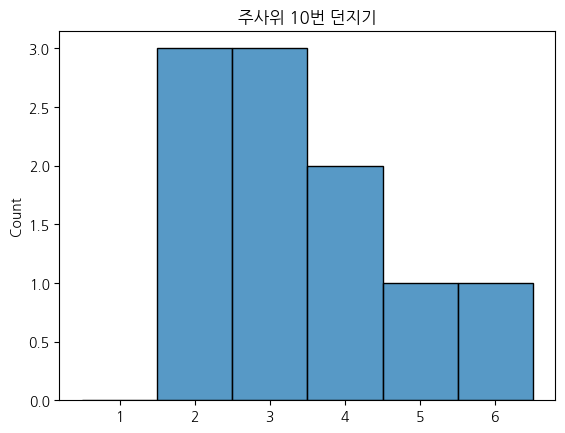

In [17]:
import seaborn as sns

## 주사위를 10번 던졌을 때
n = 10
data = np.random.choice(np.arange(1, 7), n, replace=True)
sns.histplot(data, bins=np.arange(1, 8) - 0.5, edgecolor="black")
plt.title(f"주사위 {n}번 던지기")
plt.show()

#### 정규분포를 따르는 데이터 생성하기


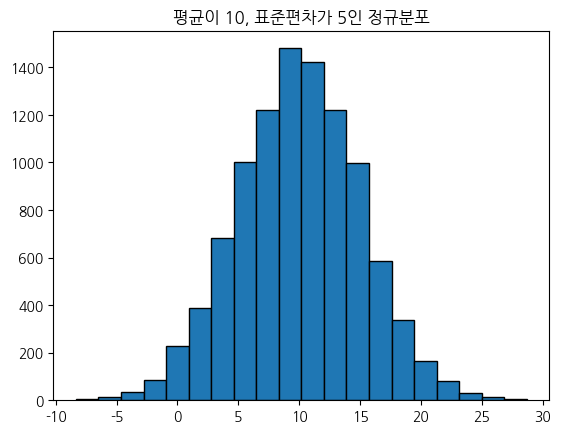

Mean :  9.988359490542924
Standard Deviation :  5.02197798034724
(10000,)


In [18]:
## 평균이 10, 표준편차가 5인 정규분포를 따르는 데이터 100개 생성
# np.random.seed(123)
data = np.random.normal(
    10,  # 평균,
    5,  # 표준편차
    10000,  # 개수
)

plt.hist(data, bins=20, edgecolor="black")
plt.title("평균이 10, 표준편차가 5인 정규분포")
plt.show()

print("Mean : ", np.mean(data))
print("Standard Deviation : ", np.std(data))
print(data.shape)

#### 표준 정규 분포 이용하기


- 한국 30대 남자 키의 평균은 174cm, 표준편차는 6cm이다. 이때, 남자의 키가 182이상일 확률은 얼마인가?<br>
  (이때 30대 남자의 키는 정규분포를 따르고 있다고 가정)


##### 표준화 변환 이용하기


In [26]:
# z = (X - mu) / sigma
z = (182 - 174) / 6
print("Z-score : ", z)

Z-score :  1.3333333333333333


##### 표준정규분포 활용


In [27]:
# 2. 표준정규분포 활용
import scipy.stats as stats

p = stats.norm.cdf(z)
print("P-value : ", p)

P-value :  0.9087887802741321


##### 확률 계산


In [28]:
percent = (1 - p) * 100
print(f"남자의 키가 182cm 이상일 확률 : {percent : .2f}%")

남자의 키가 182cm 이상일 확률 :  9.12%


### 추정


#### 통계적 추정


##### 추정 예제


- 전국 스타벅스의 전지점의 월 텀블러 평균 판매량의 신뢰구간을 추정하기 위해서 36개 지점을 표본으로 선택하여 판매량을 조사하였더니
  다음과 같았다.
- [29, 24, 27, 28, 24, 25, 26, 26, 28, 26, 25, 26, 27, 26, 19, 25, 26, 26, 26, 25, 25, 28, 30, 32, 31, 27, 31, 29, 25, 17, 21, 23, 23, 26, 27, 27]
- 판매량의 분포는 정규분포를 따른다고 알려져 있다(가정)
- 신뢰도 95%로 텀블러 판매량의 신뢰구간을 추정하여라


In [29]:
tblr = [
    29,
    24,
    27,
    28,
    24,
    25,
    26,
    26,
    28,
    26,
    25,
    26,
    27,
    26,
    19,
    25,
    26,
    26,
    26,
    25,
    25,
    28,
    30,
    32,
    31,
    27,
    31,
    29,
    25,
    17,
    21,
    23,
    23,
    26,
    27,
    27,
]
tblr

[29,
 24,
 27,
 28,
 24,
 25,
 26,
 26,
 28,
 26,
 25,
 26,
 27,
 26,
 19,
 25,
 26,
 26,
 26,
 25,
 25,
 28,
 30,
 32,
 31,
 27,
 31,
 29,
 25,
 17,
 21,
 23,
 23,
 26,
 27,
 27]

In [30]:
n = len(tblr)  # 표본의 크기
ci = 0.95  # 신뢰수준
x_bar = np.mean(tblr)  # 표본평균
s = np.std(tblr, ddof=1)  # 표본 표준편차(ddof=1로 표본 표준편차 계싼)
print(n, ci, x_bar, s)

36 0.95 26.0 3.04255531702266


##### 신뢰 구간 계산


In [31]:
t_critical = stats.t.ppf((1 + ci) / 2, df=n - 1)
margin_of_error = t_critical * (s / np.sqrt(n))
uci = x_bar + margin_of_error
lci = x_bar - margin_of_error
print("신뢰구간 : ", (lci, uci))

신뢰구간 :  (np.float64(24.970547388128676), np.float64(27.029452611871324))


In [32]:
## 신뢰구간 추정 function
def t_interval(data, conf_level=0.95):
    n = len(data)
    df = n - 1
    x_bar = np.mean(data)
    s = np.std(data, ddof=1) / np.sqrt(n)
    t_critical = stats.t.ppf((1 + conf_level) / 2, df)  # t분포!
    return (x_bar - t_critical * s, x_bar + t_critical * s)


# 정규분포 대신 t분포를 사용하는 이유는 표본의 크기가 작거나(보통 n<30인 경우) 모집단의 분산을 모르는 경우에 사용
# 표본 크기가 커질수록 t분포는 정규 분포에 가까워지며, 표본 크기가 충분히 큰 경우(보통 n > 30)에는 정규 분포를 사용해도 무방!

In [34]:
print("신뢰구간 : ", t_interval(tblr, conf_level=0.95))  # same!

신뢰구간 :  (np.float64(24.970547388128676), np.float64(27.029452611871324))


#### 심화


월간 텀블러 판매량이 30개 이상일 확률은?


In [36]:
# 30에 해당하는 t_value 찾기
t_value = (30 - x_bar) / s
t_value

np.float64(1.314684396244359)

In [37]:
# 이 t_value가 가질 수 있는 확률값 계산
p = stats.t.cdf(t_value, df=n - 1)
print("월간 텀블러 판매량이 30개 이상일 확률 : ", (1 - p) * 100, "%")

월간 텀블러 판매량이 30개 이상일 확률 :  9.858295779459569 %


In [39]:
# 월간 텀블러 판매량이 27 ~ 28개 사이일 확률은?
# 27, 28에 해당하는 t_value 찾기
t_value_upper = (28 - x_bar) / s
t_value_lower = (27 - x_bar) / s

In [40]:
# 각각의 t_value가 가질 수 있는 확률값 계산
p_upper = stats.t.cdf(t_value_upper, df=n - 1)
p_lower = stats.t.cdf(t_value_lower, df=n - 1)

print(
    "월간 텀블러 판매량이 27~28개 사이일 확률 : ",
    (p_upper - p_lower) * 100,
    "%",
)

월간 텀블러 판매량이 27~28개 사이일 확률 :  11.455100242054062 %


##### 신뢰구간 확인 애니메이션

- 신뢰수준이 95%인 신뢰구간:<br>
  모집단 평균이 이 신뢰구간 내에 있을 확률이 95%다 라고 해석 가능<br>
  100번의 추정 중 약 95번은 신뢰구간이 모집단 평균을 포함할 것임을 의미


(array([ 5.,  4.,  9., 18., 18., 11., 16., 13.,  3.,  3.]),
 array([-2.43192842, -1.94178515, -1.45164187, -0.9614986 , -0.47135533,
         0.01878795,  0.50893122,  0.9990745 ,  1.48921777,  1.97936104,
         2.46950432]),
 <BarContainer object of 10 artists>)

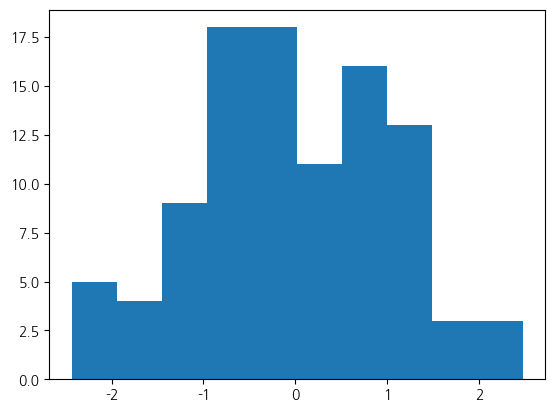

In [42]:
size = 50  # 시행별 샘플의 수
samples = 100  # 샘플의 수(시행횟수)
pd.DataFrame(np.random.randn(samples, size))

plt.hist(pd.DataFrame(np.random.randn(samples, size))[0])

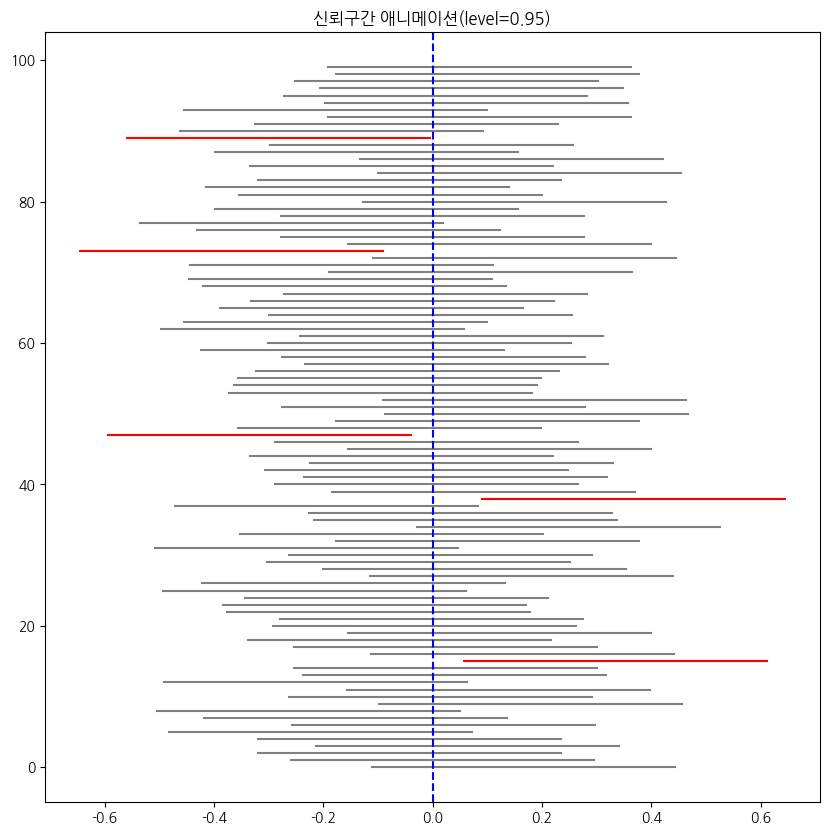

In [49]:
def conf_int_animation(level=0.95, size=50, samples=100):
    fig, ax = plt.subplots(figsize=(10, 10))
    data = np.random.randn(samples, size)  # 표준정규분포를 따르는 숫자 생성
    means = data.mean(axis=1)
    ci_lower, ci_upper = stats.norm.interval(level, loc=means, scale=1 / np.sqrt(size))

    indices = np.random.permutation(samples)  # 랜던 순서의 인덱스 생성

    for i in indices:
        mean, low, high = means[i], ci_lower[i], ci_upper[i]
        color = "red" if low > 0 or high < 0 else "grey"
        ax.plot([low, high], [i, i], color=color)

    ax.axvline(0, color="blue", linestyle="--")
    plt.title(f"신뢰구간 애니메이션(level={level})")
    plt.show()


conf_int_animation(
    level=0.95,  # 신뢰수준
    size=50,  # 각 시행별 뽑히는 샘플의 개수
    samples=100,  # 각 샘플의 수(시행횟수)
)

### 검정


#### 가정 확인


##### 정규분포 가정


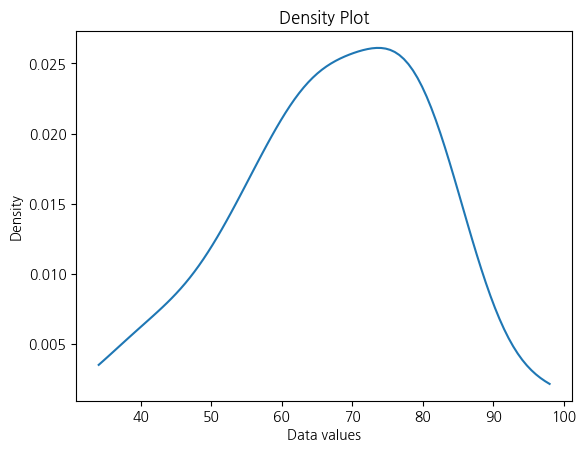

In [9]:
# 정규분포 따르는지 확인
data = np.array([ 34, 76, 76, 63, 73, 75, 67, 78, 81, 53, 58, 81, 77, 80, 43, 65, 76, 63, 54, 64, 85, 54, 70, 71, 71, 55, 40, 78, 76, 70, 42, 63, 61, 82, 67, 98, 59, 63, 84, 50, 67, 80, 83, 66, 86, 57, 48 ])
# 커널 밀도 추정
density = stats.gaussian_kde(data)
x = np.linspace(min(data), max(data), 100)
y = density(x)

plt.figure()
plt.plot(x, y)
plt.title("Density Plot")
plt.xlabel("Data values")
plt.ylabel("Density")
plt.show()

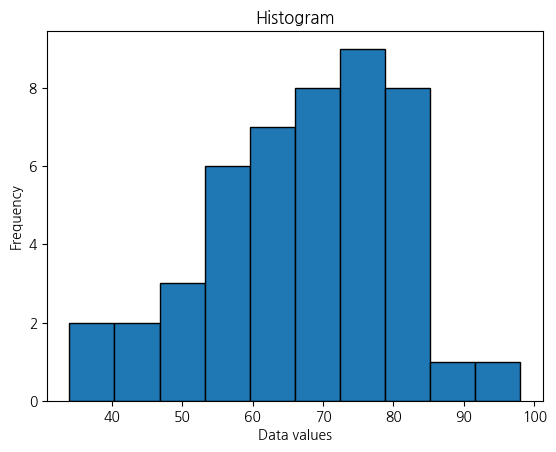

In [10]:
# 히스토그램 플롯
plt.figure()
plt.hist(data, bins=10, edgecolor="black")
plt.title("Histogram")
plt.xlabel("Data values")
plt.ylabel("Frequency")
plt.show()

In [13]:
# H0 : data는 정규분포를 따른다
# H1 : data는 정규분포를 따르지 않는다
shapiro_test = stats.shapiro(data)
print("Shapiro-Wil test : ", shapiro_test)

## 해석
# p-value가 0.05보다 크면 정규성 가정 만족!
# p-value가 0.05보다 작으면 정규성 가정 만족 X
if shapiro_test.pvalue > 0.05:
    print("데이터는 정규분포를 따름")
else:
    print("데이터는 정규분포를 따르지 않음")

Shapiro-Wil test :  ShapiroResult(statistic=np.float64(0.9777001582707601), pvalue=np.float64(0.500829673580824))
데이터는 정규분포를 따름


##### 등분산 가정


In [16]:
## 등분산 가정
# H0 : 두 data는 등분산이다
# H1 : 두 data는 등분산이 아니다
data1 = np.random.normal(1, 0.1, 100)
data2 = np.random.normal(1, 0.2, 50)
var_test = stats.levene(data1, data2)
print("Levene's test for equal variances : ", var_test)


## 해석
# p-value가 0.05보다 크면 등분산 가정 만족!
# p-value가 0.05보다 작으면 등분산 가정 만족 X
if var_test.pvalue > 0.05:
    print("데이터는 등분산을 만족")
else:
    print("데이터는 등분산을 만족하지 않음")

Levene's test for equal variances :  LeveneResult(statistic=np.float64(31.623479383350933), pvalue=np.float64(9.059629833415042e-08))
데이터는 등분산을 만족하지 않음


### 그룹 비교

#### 두 그룹 비교

![image.png](../1.data/image.png)


##### 1-1. T-Test


C:\Users\cho03\AppData\Local\Temp\ipykernel_13528\1725007039.py:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([before_study, after_study], labels=['Before', 'After'])


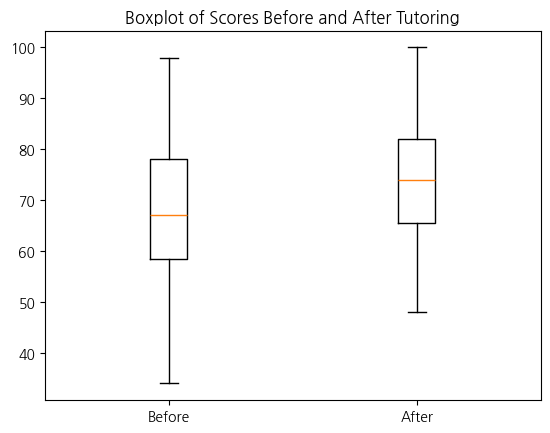

In [17]:
# T-Test
# 과외 이전/이후 수학 성적 비교
before_study = np.array([ 34, 76, 76, 63, 73, 75, 67, 78, 81, 53, 58, 81, 77, 80, 43, 65, 76, 63, 54, 64, 85, 54, 70, 71, 71, 55, 40, 78, 93, 64, 42, 63, 61, 82, 67, 98, 59, 63, 84, 50, 67, 80, 83, 66, 86, 57, 48])
after_study = np.array([ 74, 87, 89, 98, 65, 82, 70, 70, 70, 84, 56, 76, 72, 69, 73, 61, 83, 82, 89, 75, 48, 72, 80, 66, 82, 71, 49, 54, 63, 65, 100,  82, 75, 62, 83, 90, 76, 87, 90, 78, 63, 59, 79, 71, 65, 77, 74])

plt.figure()
plt.boxplot([before_study, after_study], labels=["Before", "After"])
plt.title("Boxplot of Scores Before and After Tutoring")
plt.show()

In [19]:
# 정규성 확인
print("Shapiro-Wil test : ", stats.shapiro(before_study))
print("Shapiro-Wil test : ", stats.shapiro(after_study))
# -> 둘다 정규분포를 따름

# 등분산성 확인
print(
    "Levene's test for equal variances : ",
    stats.levene(before_study, after_study),
)
# -> 등분산임

Shapiro-Wil test :  ShapiroResult(statistic=np.float64(0.9853525177585915), pvalue=np.float64(0.8146527755919009))
Shapiro-Wil test :  ShapiroResult(statistic=np.float64(0.9896698255500068), pvalue=np.float64(0.9492020759782446))
Levene's test for equal variances :  LeveneResult(statistic=np.float64(1.742022982465631), pvalue=np.float64(0.19015750222163658))


##### 양측 검정


In [21]:
# t-test(양측 검정)
# a == b?
# H0 : 과외 이전 성적 == 과외 이후 성적
# H0 : 과외 이전 성적 != 과외 이후 성적
t_test_result = stats.ttest_rel(a=before_study, b=after_study, alternative="two-sided")  # two-sided : 양측검정, 기본값
print("Paired t-test : ", t_test_result)

# 해석
# p-value값이 0.05보다 작으면 귀무가설(H0)을 기각하고 대립가설(H1)을 채택
if t_test_result.pvalue < 0.05:
    print("과외 이전과 이후의 수학 성적에 유의미한 차이가 있음")
else:
    print("과외 이전과 이후의 수학 성적에 유의미한 차이가 없음")

Paired t-test :  TtestResult(statistic=np.float64(-2.3499257719818125), pvalue=np.float64(0.023123525046420602), df=np.int64(46))
과외 이전과 이후의 수학 성적에 유의미한 차이가 있음


##### 단측 검정


<ul>
  <li>a, b위치 및 alternative에 유의할 것
  <ul>  
    <li>alternative = 'less'<br>a의 평균이 b의 평균보다 작은지(즉, a < b)를 검정 alternative = 'less'를 사용하면 "a가 b보다 작은가?를 묻는 것</li>
   <li>alternative = 'greater'<br>a의 평균이 b의 평균보다 작은지(즉, a < b)를 검정 alternative = 'greater'를 사용하면 "a가 b보다 큰가?를 묻는 것</li>
  </ul>
  </li>
</ul>


In [22]:
# t-test 단측 검정 (참고)
# 단측 검정시 위치에 유의!!
# 귀무가설 (H0) :
# 대립가설 (H1) : a의 평균이 b의 평균보다 작음(a < b) -> a is less than b? => a < b ?
t_test_result_less = stats.ttest_rel(
    a=before_study, b=after_study, alternative="less"
)  # 'less' (단측 검정, 작은 쪽) / 'greater' (단측 검정, 큰 쪽)

print("One-sided t-test (less) : ", t_test_result_less)

# 해석
# p-value 값이 0.05보다 작으면 귀무가설(H0)을 기각하고 대립가설(H1)을 채택
if t_test_result_less.pvalue < 0.05:
    print("과외 이후 수학 성적이 유의미하게 향상되었음")
else:
    print("과외 이후 성적이 유의미하게 향상되지 않았음")

One-sided t-test (less) :  TtestResult(statistic=np.float64(-2.3499257719818125), pvalue=np.float64(0.011561762523210301), df=np.int64(46))
과외 이후 수학 성적이 유의미하게 향상되었음


In [23]:
# t-test 단측 검정 (참고)
# 단측 검정시 위치에 유의!!
# 귀무가설 (H0) :
# 대립가설 (H1) : a의 평균이 b의 평균보다 큼(a > b) -> a is greater than b? => a > b ?
t_test_result_less = stats.ttest_rel(
    a=before_study, b=after_study, alternative="greater"
)  # 'less' (단측 검정, 작은 쪽) / 'greater' (단측 검정, 큰 쪽)

print("One-sided t-test (greater) : ", t_test_result_less)

# 해석
# p-value 값이 0.05보다 작으면 귀무가설(H0)을 기각하고 대립가설(H1)을 채택
if t_test_result_less.pvalue < 0.05:
    print("과외 이전 수학 성적이 과외 이후 수학 성적보다 더 좋았음")
else:
    print("과외 이전 수학 성적이 과외 이후 수학 성적보다 더 좋지 않았음")

One-sided t-test (greater) :  TtestResult(statistic=np.float64(-2.3499257719818125), pvalue=np.float64(0.9884382374767897), df=np.int64(46))
과외 이전 수학 성적이 과외 이후 수학 성적보다 더 좋지 않았음


<ul>
  <li>두 그룹의 평균을 비교하고 싶을 때
    <ol>
      <li>유의미한 차이가 있는지(같은지 다른지) 양측 검정 수행 후</li>
      <li>어느 쪽이 더 큰지 알아보는 단측 검정 수행</li>
    </ol>
  </li>
</ul>


##### 1-2. Mann-Whitney U test


In [25]:
### 1-2. Mann-Whitney U test
# 정규성 가정을 만족하지 않는 경우!
mann_whitney_result = stats.wilcoxon(x = before_study, y = after_study, alternative = 'two-sided') # "two-sided", "less", "greter"

print("Mann-Whitney U test : ", mann_whitney_result)

# p-value 값이 0.05보다 작으면 귀무가설(H0)을 기각하고 대립가설(H1)을 채택
if mann_whitney_result.pvalue < 0.05 :
  print("과외 이전과 이후의 수학 성적에 유의미한 차이가 있음")
else:
  print("과외 이전과 이후의 수학 성적에 유의미한 차이가 없음")

Mann-Whitney U test :  WilcoxonResult(statistic=np.float64(353.0), pvalue=np.float64(0.024946160280194363))
과외 이전과 이후의 수학 성적에 유의미한 차이가 있음


##### 1-3. Welch's t-test


<ul>
  <li>equal_var : scipy.stats.ttest_ind 함수에서 두 표본의 분산이 동일하다고 가정할지 여부를 지정</li>
  <li>equal_var = True
    <ul>
      <li>가정 : 두 표뵨의 분산이 동일하다고 가정</li>
      <li>두 표본이 동일한 분산을 가지는 경우에 사용, 이 경우에 통계적 검정력이 더 강함</li>
    </ul>
  </li>
  <li>equal_var = False
  <ul>
    <li>가정 : 두 표뵨의 분산이 다를 수 있다고 가정</li>
    <li>두 표본이 다른 분산을 가지는 경우에 사용, 분산이 다를 수 있는 경우에 더 신뢰할 수 있는 결과를 제공</li>
  </ul>
  </li>


</ul>

In [27]:
## 1-3. Welch's t-test
# 등분산 가정을 따르지 않는 경우
welch_t_test_result = stats.ttest_ind(before_study, after_study, equal_var=False) # 분산이 다른 경우가 많아서... equal_var = False를 사용하는 것이 더 안전한 선택
print("Welch's t-test : ", welch_t_test_result)

# p-value 값이 0.05보다 작으면 귀무가설(H0)을 기각하고 대립가설(H1)을 채택
if welch_t_test_result.pvalue < 0.05 :
  print("과외 이전과 이후의 수학 성적에 유의미한 차이가 있음")
else:
  print("과외 이전과 이후의 수학 성적에 유의미한 차이가 없음")

Welch's t-test :  TtestResult(statistic=np.float64(-2.469198134722159), pvalue=np.float64(0.015450979789060345), df=np.float64(88.99167087963141))
과외 이전과 이후의 수학 성적에 유의미한 차이가 있음


##### 1-4. 예제


In [32]:
# %pip install statsmodels

C:\Users\cho03\AppData\Local\Temp\ipykernel_13528\167418237.py:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([sleep['extra'][sleep['group'] == 1], sleep['extra'][sleep['group'] == 2]], labels=['Group 1', 'Group 2'])


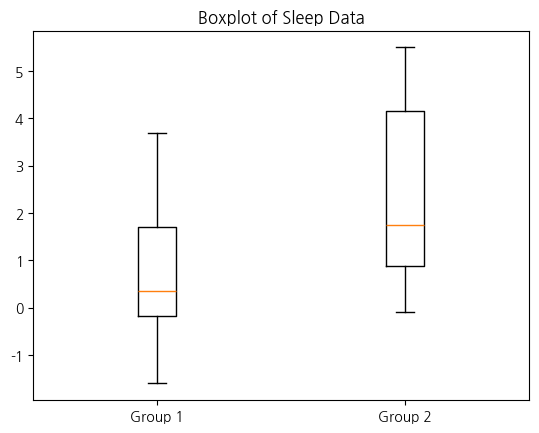

In [31]:
### 1-4. 예제
from statsmodels.datasets import get_rdataset
sleep = get_rdataset('sleep', 'datasets').data
plt.figure()
plt.boxplot([sleep['extra'][sleep['group'] == 1], sleep['extra'][sleep['group'] == 2]], labels=['Group 1', 'Group 2'])
plt.title("Boxplot of Sleep Data")
plt.show()

In [33]:
t_test_sleep = stats.ttest_ind(
    sleep["extra"][sleep["group"] == 1],
    sleep["extra"][sleep["group"] == 2],
    alternative = 'greater'
)

# H1 : group1이 group2보다 큰가?
# p-value가 0.05보다 작으면 yes!
print("Sleep data t-test : ", t_test_sleep)

# p-value 값이 0.05보다 작으면 귀무가설(H0)을 기각하고 대립가설(H1)을 채택
if t_test_sleep.pvalue < 0.05 :
  print("Group 1가 Group 2보다 평균이 유의미하게 더 크다고 할 수 있음")
else:
  print("Group 1가 Group 2보다 평균이 유의미하게 더 크다고 할 수 없음")

Sleep data t-test :  TtestResult(statistic=np.float64(-1.8608134674868524), pvalue=np.float64(0.9604066428920309), df=np.float64(18.0))
Group 1가 Group 2보다 평균이 유의미하게 더 크다고 할 수 없음


#### 3개 이상의 그룹 비교

##### 2-1. ANOVA


In [ ]:
#### 2-1. ANOVA
# 전국 신규 민간 아파트 분양가격 동향 데이터
real = pd.read_csv(ppath + "1.data/real estate.csv", encoding = 'euc-kr')
real['분양가격'] = pd.to_numeric(real['분양가격'], errors='coerce')
real['지역명'] = real['지역명'].astype('category')
real['연도'] = real['연도'].astype('category')
real['월'] = real['월'].astype('category')

# 결측값 제거
real =real.dropna(subset = ['분양가격'])

df = real
df.head()

In [ ]:
grouped = df.groupby('지역명')
grouped_df = grouped['분양가격'].agg(['mean']) # real.groupby('지역명')['분양가격].mean()
# grouped_df = grouped_df.reset_index() # index를 컬럼으로 바꾸고 싶다면!
grouped_df

In [ ]:
plt.figure()
df.boxplot(column = '분양가격', by = '지역명')
plt.title("Boxplot of 지역에 따른 분양가")
plt.show()

##### ANOVA

In [35]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [ ]:
# ANOVA
# H0 : 지역별 m^2당 분양가에 차이가 없다.
# H1 : 지역별 m^2당 분양가에 차이가 있다.
anova_model = ols("분양가격 ~ C(지역명)", data=df).fit()  # y ~ x형태이며, C는 범주형 변수임을 나타냄!
anova_results = sm.stats.anova_lm(anova_model, typ = 2) # 분산 계산 방식에 따라 1,2,3
print(anova_results)

# 해석
# Pr(>F) 값이 0.05보다 작으므로 H0을 기가
# 지역별 m^2당 분양가에 유의한 차이가 있다

<ul> ANOVA 결과 해석
  <li>C(지역명):<br>
  df : 16.0 - 지역명 변수의 자유도(Degrees of Freedom). 17개의 지역이 있으며, 자유도는 n-1이므로 16<br>
  sum_sq : 3.739884e+09 - 지역명 변수에 의해 설명되는 총 제곱합(Sum of Squares)<br>
  mean_sq : 2.337427e+08 - 평균 제곱합(Mean Square). sum_sq를 df로 나눈 값<br>
  F : 1448.532682 - F-통계량(F-statistic). 이는 "지역명" 변수가 분양가격에 미치는 영향의 크기, 높은 값은 큰 영향을 의미<br>
  PR(>F): 0.0 - p-값(p-value). 지역명 변수가 분양 가격에 미치는 영향이 통계적으로 유의미한지를 나타냄
  <ul> 
    <li>p-값이 0.0으로 매우 작음을 의미, 지명 변수가 분양가격에 유의미한 영향을 미침으 ㄹ알 수 있음</li>
  </ul>
  </li>
  <li>Residual(잔차):<br>
  df : 3256.0 - 잔차의 자유도. 이는 총 샘플 수에서 "지역명" 변수의 자유도를 뺀 값<br>
  sum_sq : 5.254050e+08 - 잔차(residual)에 의해 설명되는 부분<br>
  mean_sq : 1.613652e+05 - 평균 제곱합. sum_sq를 df로 나눈 값<br>
  F : 잔차에 대한 F-통계량은 계산되지 않음<br>
  PR(>F) : 잔차에 대한 p-값은 계산되지 않음
  </li>
</ul>

In [36]:
# 정규성 가정 확인
shapiro_test = stats.shapiro(anova_model.resid)
print("Shapiro-Wilk test for narmality : ", shapiro_test)

# 해석
# p-value가 0.05보다 작으면 정규성 가정을 만족하지 않음

NameError: name 'anova_model' is not defined

In [ ]:
# 참고 : 다른 정규성 판단 함수
ad_test = stats.anderson(anova_model.resid)
print("Anderson-Darling test for normality : ", ad_test)

In [ ]:
# 등분산성 가정 확인
# H0 : 지역별 데이터는 서로 분산이 같다
# H1 : 지역별 데이터는 서로 분산이 다르다
bartlett_test = stats.bartlett(*df['분양가격'][df['지역명'] == region] for region in df['지역명'].unique())
# df는 데이터프레임에서 지역명 별로 분양가격 데이터를 추출
# *는 리스트를 언패킹해서 각 요소를 개별 인수로 함수에 전달!

print("Bartlett's test for equal variances : ", bartlett_test)

# 해석
# p-value가 0.05보다 작으면 등분산 가정을 만족하지 않음

In [ ]:
# print(*df['분양가격'][df['지역명'] == region] for region in df['지역명'].unique())

##### (심화1) Tukey HSD


In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# 유의미한 차이가 있는 경우, 어떤 지역에 유의한 차이가 있는 것일까?
tukey_result = pairwise_tukeyhsd(df['분양가격'], df['지역명'], alpha = 0.05) # alpha : 유의수준
print(tukey_reusl) # group2 - group1임에 유의!

In [ ]:
tukey_result.plot_simulaneous()
plt.title("Tukey HSD Test 결과")
plt.show()

In [ ]:
# 수동으로 시각화
def plot_tukey_hsd(tukey_result):
  groups = tukey_result.groupsunique
  n_groups = len(groups)

  fig, ax = plt.subplots(figsize=(12, n_groups))

  for i, (group1, group2, meandiff, p_adj, lower, upper, reject ) in enumerate(tukey_result._result_table.data[1:]):
    y = n_groups - i - 1
    color = 'red' if reject else 'grey'
    ax.plot([lower, upper], [y, y], color=color)
    ax.plot(meandiff, y, 'o', color='black')
    # 값 표시 원할 경우
    # ax.test(lower, y, f`{lower:.2f}`, verticalalignment='center', horizontalalignment='right, fontsize=8)
    # ax.test(upper, y, f`{lower:.2f}`, verticalalignment='center', horizontalalignment='left, fontsize=8)
    # ax.test(meandiff, y, f`{lower:.2f}`, verticalalignment='center', horizontalalignment='right, fontsize=8, color='white',)

    ax.test(upper, y, f`{group1} - {group2}`, verticalalignment='center',horizontalalignment='left', fontsize=8)
  
  ax.axvline(0, color='blue',linestyle='--')
  
  plt.title('Tukey HSD Test 결과')
  plt.xlabel('Mean Difference')
  plt.ylabel('Group Compairson')
  plt.show()

plot_tukey_hsd(tukey_result)

##### (심화2) Two-way ANOVA


In [37]:
# two-way anova
# 지역명, 연도를 동시에 고려
# 지역명(17) * 연도(5) = 85개 각각을 개별 집단/처리(groups, treatments)로 간주하고 이들간에 평균을 비교
two_way_anova = ols('분양가격 ~ C(지역명) + C(연도)', data = df).fit()
two_way_anova_results = sm.stats.anova_lm(two_way_anova, typ = 2)
print("Two-way ANOVA 결ㅈ과 : \n", two_way_anova_results)

# 해석
# Pr(>F) 값이 0.05보다 작으면 H0 기각
# 년도별 평당 분양가에 유의한 차이가 있다
# 지역별 평당 분양가에 유의한 차이가 있다

NameError: name 'df' is not defined

##### 2-2. Kruskal-Wallis Rank sum test


In [ ]:
# 2-2. Kruskal-Wallis Rank sum test
# 정규성 X, 등분산성 O
# H0 : 지역에 따른 분양가격의 차이가 없다
# H1 : 지역에 따른 분양가겨의 차이가 있다
kruskal_test = stats.kruskal(*df['분양가격'][df['지역명'] == region] for region in df['지역명'].unique())
print("Kruskal-Wallis test : ", kruskal_test)

# 해석
# p-value가 0.05보다 작으면 지역에 따른 분양가격의 차이가 있음

##### 2-3. Welch's ANOVA


In [ ]:
# 2-3. Welch's ANOVA
# 정규성 O, 등분산성 X
# H0 : 지역에 따른 분양가격의 차이가 없다
# H1 : 지역에 따른 분양가겨의 차이가 있다

welch_anova = sm.stats.anova_lm(ols('분양가격 ~ C(지역명)', data=df).fit(), typ=2, robuse = 'hc3') # 분산이 다를 때의 ANOVA 수행
print("Welch's ANOVA 결과 : \n", welch_anova)

#### 3. Chisquared Test

In [ ]:
# 3. Chisquared-test
insurance_data = pd.read_csv(ppath + '1.data/insurance.csv')
insurance_data

In [ ]:
# 성별(범주형)과 흡연여부(범주형)에 관계가 있는가?
# H0 : 성별과 흡연여부는 관계가 없다(독립이다)
# H1 : 성별과 흡연여부는 관계가 있다(독립이 아니다)
chi2_test = stats.chi2_contingency(pd.crosstab(insurance_data['sex'], insurance_data['smoker']))

print("Chi-squared test : ", chi2_test)

# 해석
# p-value가 0.05보다 작으면성별과 흡연여부는 유의한 관계가 있음

#### 심화(Cramer's V)
- 유의한 관계가 있는 경우, 어느 정도의 관계가 있는 것일까?

In [ ]:
# 심화
# 유의한 관계가 있는 경우, 어느 정도의 관계가 있는 것일까?
tbl = pd.crosstab(insurance_data['sex'], insurance_data['smoker'])
print(tbl)

In [ ]:
# Cramer's V 계산 함수
def cramers_v(chi2, n, k, r):
  return np.sqrt(chi2 / (n * (min(k-1, r-1))))

# 총 관측값의 수
n = tbl.sum().sum()

# 그래프의 행 수와 열 수
k, r = tbl.shape

chi2_stat, p_sales_left, dof_sales_left, ex_sales_left = stats.chi2_contingency(tbl)

# Cramer's V 계산
cramersv = cramers_v(chi2_stat, n, k, r)
print("Cramer's V : ", cramersv)

## 해석
# Cramer's V(0 ~ 1)가 0에 가까우므로 연관성의 강도는 크지 않음
# 0~ : 연관성이 거의 없음
# 0.1 : 약한 연관성
# 0.3 : 중간 정도의 연관성
# 0.5 이상 : 강한 연관성

In [ ]:
# 참고
import seaborn as sns
sns.heatmap(chi2_test[3], annot = True, cmap = "YIGnBu")
plt.title('Residuals')
plt.show()

## 해석
# female의 경우 smoke_yes와는 negative 하는 경향
# female의 경우 smoke_no와는 positive 하는 경향
# male의 경우 smoke_yes와는 positive 하는 경향
# male의 경우 smoke_no와는 negative 하는 경향

### Project

#### 데이터 로드

#### ANOVA 수행

##### 2-1. 퇴사여부(left)에 따른 만족도(satisfaction_level) 차이 확인

##### 2-2. 부서별(sales)에 따른 만족도(satisfaction_level) 차이 확인

#### Chi-Square Test 수행

##### 3-1. 부서별(sales)과 퇴사여부(left) 관계 확인

##### 3-2. 연봉(salary)과 퇴사여부(left) 관계 확인

##### 3-3. 연봉(salary)과 퇴사여부(left) 관계의 강도 계산